In [1]:
import pandas as pd
import numpy as np
import glob
import itertools

In [2]:
hmr_labels = pd.read_csv("~/Desktop/MATH7243_project/unzipped/XN_project/hemorrhage-labels.csv")

In [5]:
hmr_labels.head()

,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000012eaf,0,0,0,0,0,0
1,ID_000039fa0,0,0,0,0,0,0
2,ID_00005679d,0,0,0,0,0,0
3,ID_00008ce3c,0,0,0,0,0,0
4,ID_0000950d7,0,0,0,0,0,0


In [6]:
def get_files_list(directory, sub_dir=0):
    
    if sub_dir == 0:
        directory += "/*"
    elif sub_dir == 1:
        directory += "/brain_bone_window/*"
    elif sub_dir == 2:
        directory += "/brain_window/*"
    elif sub_dir == 3:
        directory += "/max_contrast_window/*"
    elif sub_dir == 4:
        directory += "/subdural_window/*"
    else:
        raise ValueError("Invalid subdirectory")
    
    full_file_names = glob.glob(directory)
    return [x.split("/")[-1].split(".")[0] for x in full_file_names]

In [7]:
USERNAME = "sakshisuman12"
PROJECT_ROOT_DIR = "/Users/" + USERNAME + "/Desktop/MATH7243_project"
XN_PROJECT_DIR = PROJECT_ROOT_DIR + "/unzipped/XN_project"
EPIDURAL_DIR = XN_PROJECT_DIR + "/renders/epidural/"
INTRAPARENCHYMAL_DIR = XN_PROJECT_DIR + "/renders/intraparenchymal/"
INTRAVENTRICULAR_DIR = XN_PROJECT_DIR + "/renders/intraventricular/"
MULTI_DIR = XN_PROJECT_DIR + "/renders/multi/"
NORMAL_DIR = XN_PROJECT_DIR + "/renders/normal/"
SUBARACHNOID_DIR = XN_PROJECT_DIR + "/renders/subarachnoid"
SUBDURAL_DIR = XN_PROJECT_DIR + "/renders/subdural"

all_dirs = {'epidural': EPIDURAL_DIR,
            'intraparenchymal': INTRAPARENCHYMAL_DIR,
            'intraventricular': INTRAVENTRICULAR_DIR,
            'multi': MULTI_DIR,
            'normal': NORMAL_DIR,
            'subarachnoid': SUBARACHNOID_DIR,
            'subdural': SUBDURAL_DIR}
sub_dirs = [1, 2, 3, 4]

In [8]:
# Get and save filenames from all directories in a dictionary
all_files = {}
for dir_key, directory in all_dirs.items():
    directory_files = []
    for sub_dir in sub_dirs:
        directory_files.append(get_files_list(directory, sub_dir))
    all_files[dir_key] = directory_files

In [16]:
all_files.keys()

dict_keys(['epidural', 'intraparenchymal', 'intraventricular', 'multi', 'normal', 'subarachnoid', 'subdural'])

In [17]:
# Check if all filenames are same in all directories (except normal)
for dir_key, files in all_files.items():
    first, second, third, fourth = files
    one_two_intersect = np.intersect1d(first, second)
    three_four_intersect = np.intersect1d(third, fourth)
    all_intersect = np.intersect1d(one_two_intersect, three_four_intersect)
    if dir_key != "normal":
        print(dir_key, np.all(sorted(first) == sorted(all_intersect)))

epidural True
intraparenchymal True
intraventricular True
multi True
subarachnoid True
subdural True


In [21]:
hmr_labels.size

5269621

In [22]:
# Check to see if we have labelled data for all 32 classes
all_combs = [[0, 1]] * 5
for x in itertools.product(all_combs[0], all_combs[1], all_combs[2], all_combs[3], all_combs[4]):
    print((x[0], x[1], x[2], x[3], x[4]),
          hmr_labels['Image'][(hmr_labels['epidural'] == x[0])
                              & (hmr_labels['intraparenchymal'] == x[1])
                              & (hmr_labels['intraventricular'] == x[2])
                              & (hmr_labels['subarachnoid'] == x[3])
                              & (hmr_labels['subdural'] == x[4])].shape[0])

(0, 0, 0, 0, 0) 644870
(0, 0, 0, 0, 1) 32200
(0, 0, 0, 1, 0) 16423
(0, 0, 0, 1, 1) 5082
(0, 0, 1, 0, 0) 9878
(0, 0, 1, 0, 1) 1084
(0, 0, 1, 1, 0) 3677
(0, 0, 1, 1, 1) 968
(0, 1, 0, 0, 0) 15664
(0, 1, 0, 0, 1) 3311
(0, 1, 0, 1, 0) 3932
(0, 1, 0, 1, 1) 2198
(0, 1, 1, 0, 0) 6817
(0, 1, 1, 0, 1) 728
(0, 1, 1, 1, 0) 1955
(0, 1, 1, 1, 1) 871
(1, 0, 0, 0, 0) 1694
(1, 0, 0, 0, 1) 382
(1, 0, 0, 1, 0) 220
(1, 0, 0, 1, 1) 108
(1, 0, 1, 0, 0) 40
(1, 0, 1, 0, 1) 17
(1, 0, 1, 1, 0) 12
(1, 0, 1, 1, 1) 30
(1, 1, 0, 0, 0) 281
(1, 1, 0, 0, 1) 93
(1, 1, 0, 1, 0) 88
(1, 1, 0, 1, 1) 52
(1, 1, 1, 0, 0) 50
(1, 1, 1, 0, 1) 19
(1, 1, 1, 1, 0) 36
(1, 1, 1, 1, 1) 23


In [30]:
import cv2
import matplotlib.pyplot as plt


In [44]:
img = cv2.imread("/Users/sakshisuman12/Desktop/MATH7243_project/unzipped/XN_project/renders/intraventricular/brain_bone_window/ID_0a0e13868.jpg")

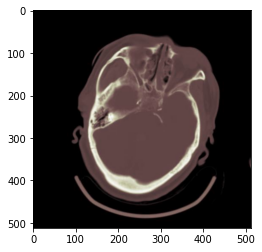

In [45]:
plt.imshow(img)

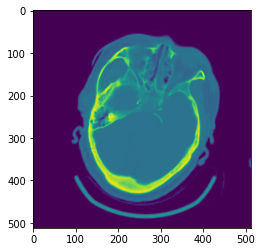

In [35]:
plt.imshow(img[:,:,0])

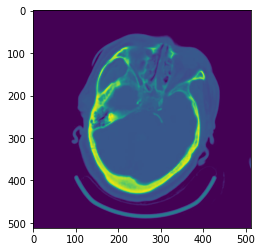

In [37]:
plt.imshow(img[:,:,1])

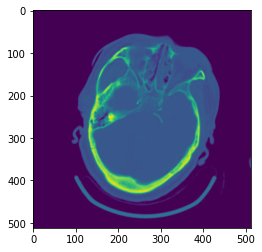

In [38]:
plt.imshow(img[:,:,2])

In [47]:
def get_new_cnn_model(input_shape):
    model = Sequential([
        Conv2D(8, kernel_size=3, activation='relu', padding='same', input_shape=input_shape, name='conv_1'),
        BatchNormalization(name='batch_norm_1'),
        MaxPooling2D(pool_size=2, name='pool_1'),
        Conv2D(16, kernel_size=3, activation='relu', padding='same', name='conv_2'),
        BatchNormalization(name='batch_norm_2'),
        MaxPooling2D(pool_size=2, name='pool_2'),
        Conv2D(32, kernel_size=3, activation='relu', padding='same', name='conv_3'),
        BatchNormalization(name='batch_norm_3'),
        MaxPooling2D(pool_size=2, name='pool_3'),
        Flatten(name='flatten'),
        Dense(256, activation='relu', name='dense_1'),
        Dropout(0.2),
        Dense(128, activation='relu', name='dense_2'),
        Dropout(0.2),
        Dense(1, activation='sigmoid', name='dense_3'),
    ])
    
    return model